<a href="https://colab.research.google.com/github/EgorGod21/NLP_projects/blob/main/Project2/comparison_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/EgorGod21/NLP_projects/main/Project2/training_results/parallel.json
!wget https://raw.githubusercontent.com/EgorGod21/NLP_projects/main/Project2/training_results/pre_ln.json
!wget https://raw.githubusercontent.com/EgorGod21/NLP_projects/main/Project2/training_results/sas.json
!wget https://raw.githubusercontent.com/EgorGod21/NLP_projects/main/Project2/training_results/sas_p.json

--2024-04-12 14:22:12--  https://raw.githubusercontent.com/EgorGod21/NLP_projects/main/Project2/training_results/parallel.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2112 (2.1K) [text/plain]
Saving to: ‘parallel.json’

parallel.json       100%[===================>]   2.06K  --.-KB/s    in 0s      

2024-04-12 14:22:12 (32.5 MB/s) - ‘parallel.json’ saved [2112/2112]

--2024-04-12 14:22:12--  https://raw.githubusercontent.com/EgorGod21/NLP_projects/main/Project2/training_results/pre_ln.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

In [2]:
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [9]:
files_names = ['pre_ln.json', 'parallel.json', 'sas.json', 'sas_p.json']
data = {'name': ['pre-ln', 'parallel', 'sas', 'sas-p'], 'perplexity': [], 'time': [], 'losses_dict': [], 'number_parameters': [321262, 320512, 271870, 271102]}

for file_name in files_names:
    with open(file_name, 'r') as f:
      str_dict = f.read()
      train_data = json.loads(str_dict)
      data['losses_dict'].append(train_data['losses_dict'])
      data['perplexity'].append(train_data['perplexity'])
      data['time'].append(train_data['time'])

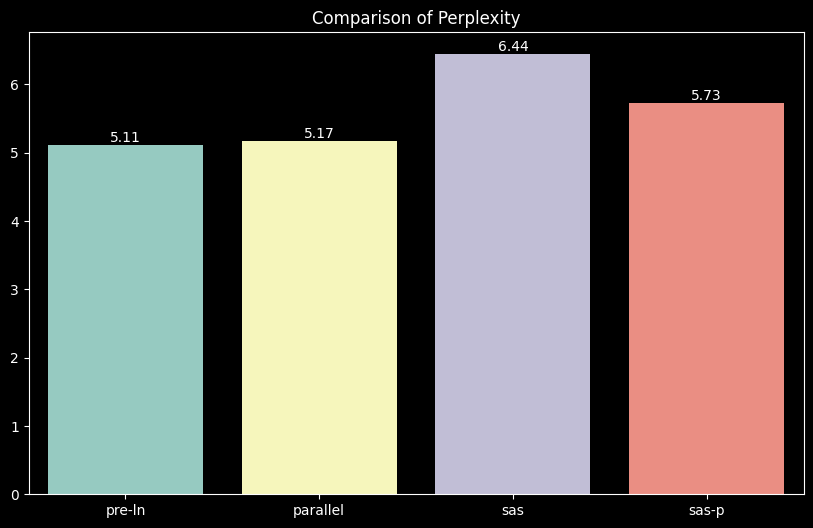

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['name'], y=data['perplexity'], palette='Set3')
plt.title('Comparison of Perplexity')
for index, value in enumerate(data['perplexity']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.savefig('perplexity.png')
plt.show()

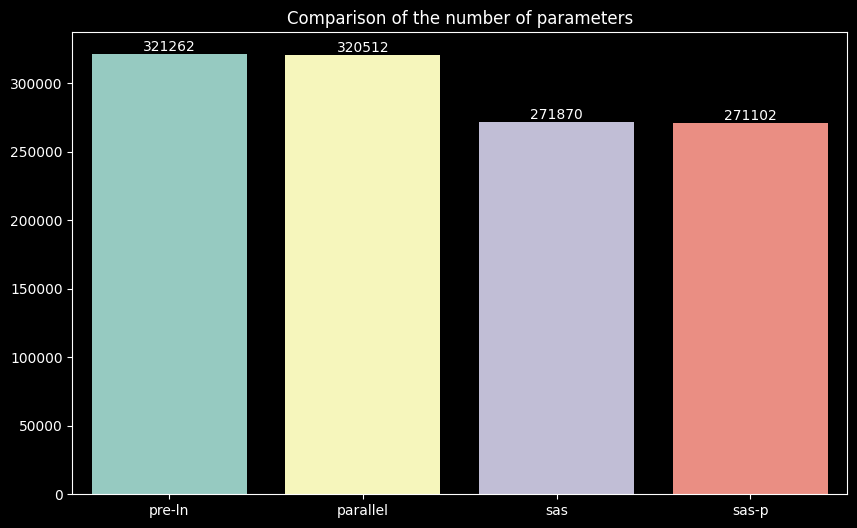

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['name'], y=data['number_parameters'], palette='Set3')
plt.title('Comparison of the number of parameters')

for index, value in enumerate(data['number_parameters']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.savefig('parameters.png')
plt.show()

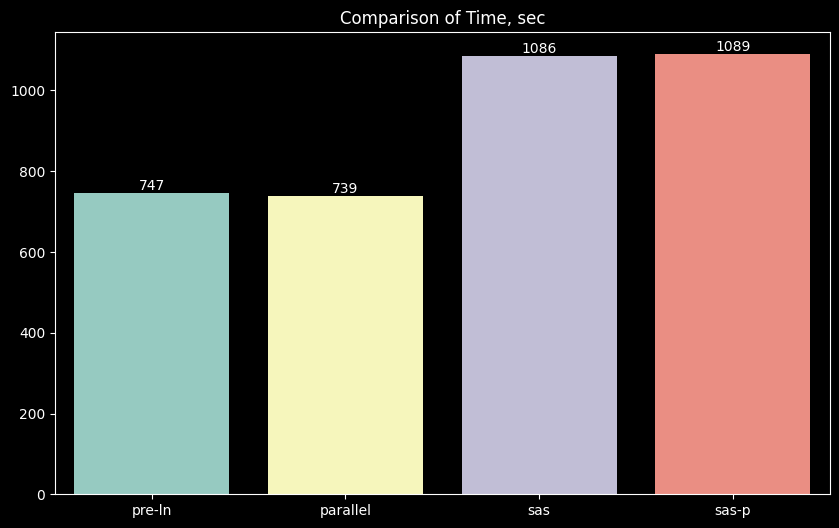

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['name'], y=data['time'], palette='Set3')
plt.title('Comparison of Time, sec')
for index, value in enumerate(data['time']):
    plt.text(index, value, str(round(value)), ha='center', va='bottom')
plt.savefig('time.png')
plt.show()

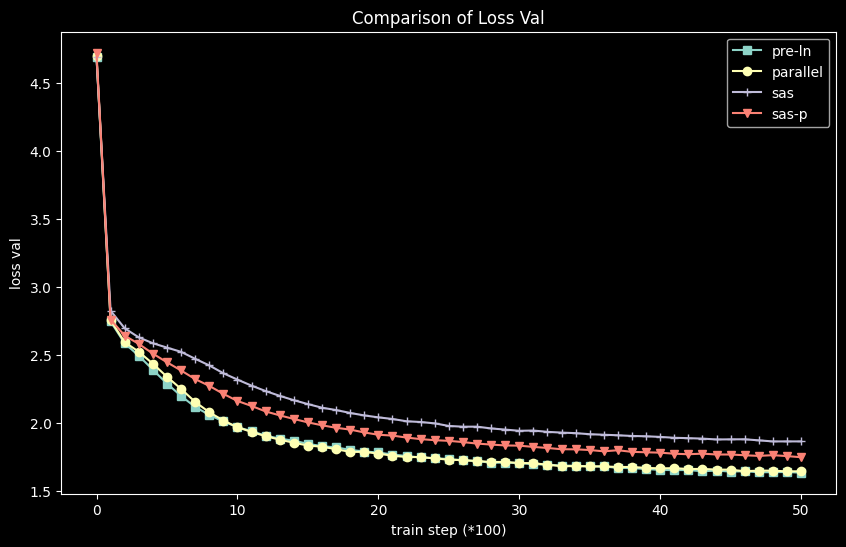

In [22]:
plt.figure(figsize=(10, 6))
train_step = np.arange(len(data['losses_dict'][0]['val']))


for i, m in zip(range(len(data['name'])), ['s', 'o', '+', 'v']):
    plt.plot(train_step, data['losses_dict'][i]['val'], marker=m, label=data['name'][i])

plt.xlabel('train step (*100)')
plt.ylabel('loss val')
plt.title('Comparison of Loss Val')
plt.legend()

plt.savefig('loss_val_comparison.png')

plt.show()